In [1]:
import numpy as np
import pathlib
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
with np.load("data/mnist.npz") as f:
        images, labels = f["x_train"], f["y_train"]
images = images.astype("float32") / 255
images = np.reshape(images, (images.shape[0], images.shape[1] * images.shape[2]))
labels = np.eye(10)[labels]

In [3]:
weight_input_hidden = np.random.uniform(-0.5, 0.5, (20, 784))
weight_hidden_output = np.random.uniform(-0.5, 0.5, (10, 20))
bias_input_hidden = np.zeros((20, 1))
bias_hidden_output = np.zeros((10, 1))

60000it [00:07, 8560.99it/s]


Acc: 96.09%


60000it [00:06, 8748.85it/s] 


Acc: 96.14%


60000it [00:06, 8582.48it/s]


Acc: 96.21%
Enter a number (0 - 59999): 12


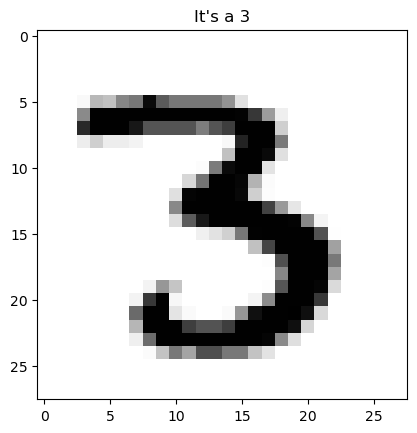

Enter a number (0 - 59999): 46


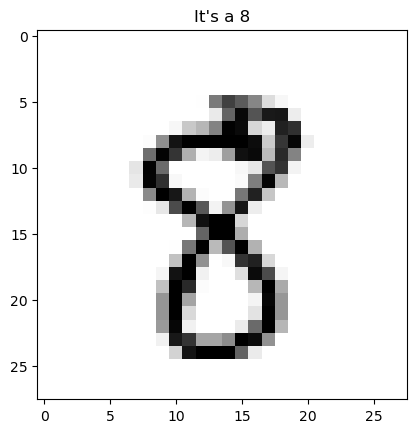

In [ ]:
learn_rate = 0.01
nr_correct = 0
epochs = 3
i = 0
for epoch in range(epochs):
    for img, l in tqdm(zip(images, labels)):
        img.shape += (1,)       
        l.shape += (1,)
        
        # Forward propagation input -> hidden
        hidden_pre = bias_input_hidden + weight_input_hidden @ img
        hidden = 1 / (1 + np.exp(-hidden_pre))
        # Forward propagation hidden -> output
        output_pre = bias_hidden_output + weight_hidden_output @ hidden
        output = 1 / (1 + np.exp(-output_pre))

        # Cost / Error calculation
        e = 1 / len(output) * np.sum((output - l) ** 2, axis=0)
        nr_correct += int(np.argmax(output) == np.argmax(l))

        # Backpropagation output -> hidden (cost function derivative)
        delta_o = output - l
        weight_hidden_output += -learn_rate * delta_o @ np.transpose(hidden)
        bias_hidden_output += -learn_rate * delta_o
        # Backpropagation hidden -> input (activation function derivative)
        delta_h = np.transpose(weight_hidden_output) @ delta_o * (hidden * (1 - hidden))
        weight_input_hidden += -learn_rate * delta_h @ np.transpose(img)
        bias_input_hidden += -learn_rate * delta_h

    # Show accuracy for this epoch
    print(f"Acc: {round((nr_correct / images.shape[0]) * 100, 2)}%")
    nr_correct = 0

# Show results
while True:
    index = int(input("Enter a number (0 - 59999): "))
    img = images[index]
    plt.imshow(img.reshape(28, 28), cmap="Greys")

    img.shape += (1,)
    
    # Forward propagation input -> hidden
    hidden_pre = bias_input_hidden + weight_input_hidden @ img.reshape(784, 1)
    hidden = 1 / (1 + np.exp(-hidden_pre))
    
    # Forward propagation hidden -> output
    output_pre = bias_hidden_output + weight_hidden_output @ hidden
    output = 1 / (1 + np.exp(-output_pre))
    

    plt.title(f"It's a {output.argmax()}")
    plt.show()